# Economics Simulation with Leontief Input-Output Models
__Dataset :__ 
Office for National Statistics. (n.d.). UK input-output analytical tables: product by product [Dataset]. Office for National Statistics. https://www.ons.gov.uk/economy/nationalaccounts/supplyandusetables/datasets/ukinputoutputanalyticaltablesdetailed

## Libraries Used

In [127]:
# NumPy Library
import numpy as np
import numpy.linalg as la

# MatPlot Library
%matplotlib inline
from matplotlib import pyplot as plt

# Python Library
import math
import random

# Panda Library
import pandas as pd
import openpyxl

# scikit-learn Library
from sklearn.linear_model import LinearRegression

## Numerical Method Used:

- __System of Linear Regression__: use Gaussian Elimination to solve Input-Output Problem
- __Linear Regression__: find Line of Best Fit
- __Random Number Generator__: miscellaneous tool to create economics situation

## Preliminary

### Part 1: Introduction to Input-Output Model

| **Economics Sectors**    | **Manufacturing** | **Agriculture** | **Service** |
|-------------------|:-----------------:|:---------------:|:-------------:|
| __Manufacturing__ | 0.30             | 0.10            | 0.20         |
| __Agriculture__   | 0.20             | 0.20            | 0.30         |
| __Service__     | 0.20             | 0.30            | 0.40         |

- __Horizontal__: Input Required per one unit Output
- __Verticle__: Economics Sectors

See that each economics sector needs can be written as a vector, for our example, we have that

$$ s_1 =
\begin{pmatrix}
0.30 \\
0.20 \\
0.20
\end{pmatrix}, \quad
s_2 =
\begin{pmatrix}
0.10 \\
0.20 \\
0.30
\end{pmatrix}, \quad
s_3 =
\begin{pmatrix}
0.20 \\
0.30 \\
0.40
\end{pmatrix}
$$

hence 
$$
(s_1 | s_2 | s_3) = 
\begin{pmatrix}
0.30 & 0.10 & 0.20 \\
0.20 & 0.20 & 0.30 \\
0.20 & 0.30 & 0.40
\end{pmatrix}
$$

the matrix is called __consumption matrix__ (or __technology matrix__). Which is denoted as

$$
C \subseteq \mathbb{R}^{n \times n}, \quad n \in \mathbb{N}
$$

Now suppose that we have a __production vector__

$$
x := (x_1,x_2,\dots,x_n)^{T}
$$

takes 
$$
Cx  := 
\begin{pmatrix}
s_{11} & \dots & s_{1n} \\
\vdots & \ddots & \vdots \\
s_{n1} & \dots & s_{nn}
\end{pmatrix}
\begin{pmatrix}
x_1 \\ \vdots \\ x_n
\end{pmatrix}
$$ 
we will have the __Intermediate Demand__.

#### Part 2: The Planned Economy Perspective

<Figure size 640x480 with 0 Axes>

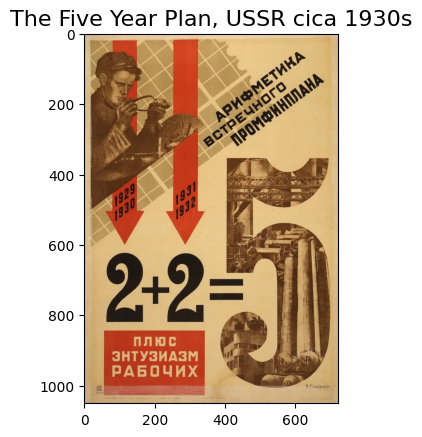

<Figure size 640x480 with 0 Axes>

In [4]:
soviet = plt.imread('soviet.jpg')
plt.imshow(soviet)
plt.title("The Five Year Plan, USSR cica 1930s", fontsize=16)
plt.figure()

We want to set __input given the current determined demand__.

$$x - Cx = d$$
where
- x: amount produced
- Cx: intermediate demand
- d: outside demand where
$$
d := (d_1,d_2,\dots,d_n)^{T}
$$

simplify the equation, then we have
$$(I-C)x = d$$

_(I-C)_ is called __Leontief matrix__. __Notice that, we can perform Gaussian Elimination to find x given desired d.__

#### Part 3: The Open Economy Perspective

<Figure size 640x480 with 0 Axes>

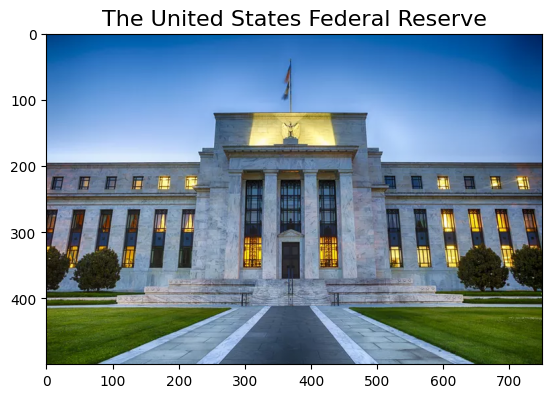

<Figure size 640x480 with 0 Axes>

In [9]:
fed = plt.imread('fed.jpg')
plt.imshow(fed)
plt.title("The United States Federal Reserve", fontsize=16)
plt.figure()

We want to set __demand given the current determined input__. Mathematically, we have that

$$(I-C)x = d \iff x = (I-C)^{-1}d$$

Hence, Leontied matrix needs to be invertible. Familarly, we can perform Gaussian Elimination to find x given d.

## Code

#### Part 0: Discussing our plan

We have the dataset from UK Office for National Statistics (n.d.) [https://www.ons.gov.uk/economy/nationalaccounts/supplyandusetables/datasets/ukinputoutputanalyticaltablesdetailed].

We will use this dataset to analyse UK Economy in 2022 depends whether the nation is ran by central planner vs interventionist free market.

$$(I-C)x = d \quad \text{Model A: "Planned Market"}$$ 

$$(I-C)^{-1}d = x \quad \text{Model B: "Free Market"}$$ 

<Figure size 640x480 with 0 Axes>

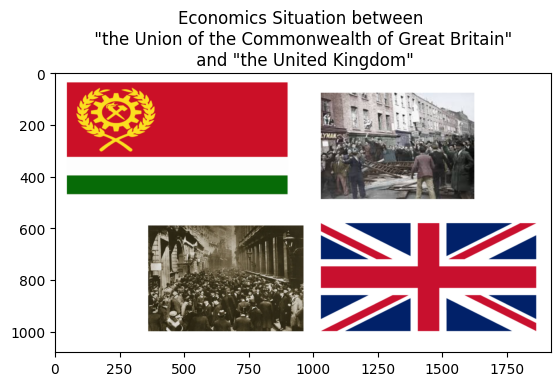

<Figure size 640x480 with 0 Axes>

In [137]:
uk = plt.imread('two.png')
plt.imshow(uk)
plt.title('Economics Situation between \n "the Union of the Commonwealth of Great Britain" \n and "the United Kingdom"', fontsize=12)
plt.figure()

#### Part 1: Preparing the Dataset

In [114]:
# Read file
file_path = "iot2022product.xlsx"
df = pd.read_excel(file_path, header=None)

# Make entry
df1 = df.iloc[:, 1:]
C = df1.to_numpy()
C = C[1:]
C = C.astype(float)

C = C.astype(float)

print(C.shape)
print(C)

(105, 105)
[[4.47681352e+03 9.25598991e-01 0.00000000e+00 ... 8.57743939e-01
  0.00000000e+00 0.00000000e+00]
 [1.75506691e+02 4.09114754e+02 0.00000000e+00 ... 1.71548788e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.26445758e+02
  1.90093472e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.45296167e+01 ... 0.00000000e+00
  9.70579392e+02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


#### Part 2: System of Linear Equation

In [115]:
# constract `constant` variable
n = C.shape[0]
I = np.eye(n)
A = I - C
invA = np.linalg.inv(A)

# experiment for N random economics situation
N = 5000

sum_x1 = []   # random x for Model A
sum_d1 = []   # computed d from Model A
sum_d2 = []   # random d for Model B
sum_x2 = []   # computed x for Model B

for _ in range(N):
    # Model A
    x_rand = np.random.rand(n, 1)
    d_modelA = A @ x_rand
    x_modelA = np.linalg.solve(A, d_modelA)

    # Model B
    d_rand = np.random.rand(n, 1)
    x_modelB = invA @ d_rand

    sum_x1.append(x_rand.sum())
    sum_d1.append(d_modelA.sum())
    sum_d2.append(d_rand.sum())
    sum_x2.append(x_modelB.sum())

# Convert lists → NumPy arrays
sum_x1 = np.array(sum_x1)
sum_d1 = np.array(sum_d1)
sum_d2 = np.array(sum_d2)
sum_x2 = np.array(sum_x2)


#### Part 3: Linear Regression

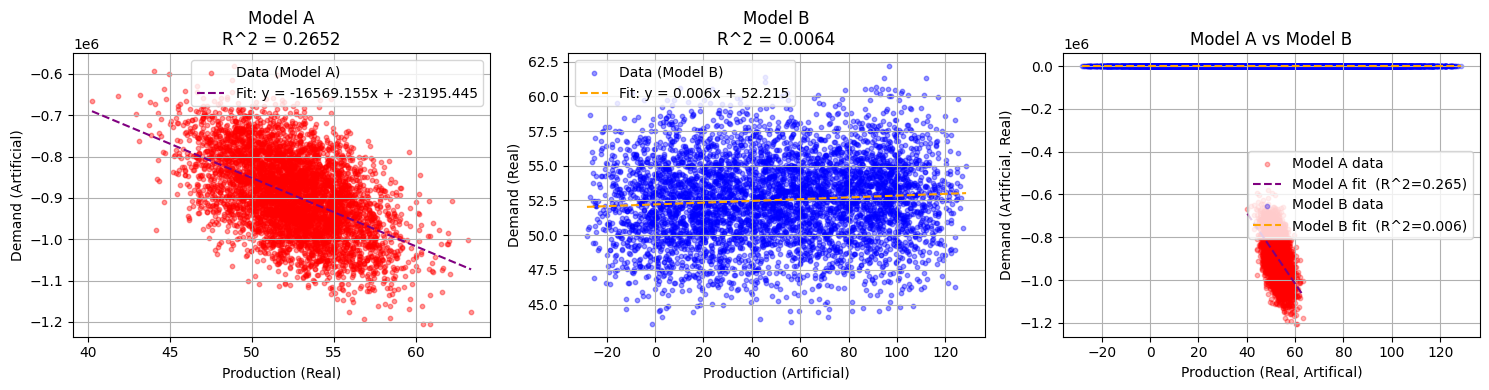



Model A (Real Production vs. Artificial Demand)
Slope: -16569.15460701141
Intercept: -23195.44509318075
R^2: 0.26524906532314274


Model B (Artificial Production vs. Real Demand)
Slope: 0.006326247111590881
Intercept: 52.21543163962619
R^2: 0.006430509466102796


In [143]:
# best fit via scikit library
def best_fit(x, y):
    X_2d = x.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X_2d, y)

    slope = model.coef_[0]
    intercept = model.intercept_
    r2 = model.score(X_2d, y)

    xs = np.linspace(x.min(), x.max(), 200)
    ys = model.predict(xs.reshape(-1, 1))

    return model, xs, ys, slope, intercept, r2

# fit model A
model1, xs1, ys1, m1, b1, r2_1 = best_fit(sum_x1, sum_d1)

# fit model B
model2, xs2, ys2, m2, b2, r2_2 = best_fit(sum_x2, sum_d2)

# plot chart
plt.figure(figsize=(15, 4))

# model A
plt.subplot(1, 3, 1)
plt.scatter(sum_x1, sum_d1, s=10, alpha=0.4, color='red', label='Data (Model A)')
plt.plot(xs1, ys1, '--', color='purple', label=f'Fit: y = {m1:.3f}x + {b1:.3f}')
plt.xlabel('Production (Real)')
plt.ylabel('Demand (Artificial)')
plt.title(f'Model A\nR^2 = {r2_1:.4f}')
plt.grid()
plt.legend()

# model B
plt.subplot(1, 3, 2)
plt.scatter(sum_x2, sum_d2, s=10, alpha=0.4, color='blue', label='Data (Model B)')
plt.plot(xs2, ys2, '--', color='orange', label=f'Fit: y = {m2:.3f}x + {b2:.3f}')
plt.xlabel('Production (Artificial)')
plt.ylabel('Demand (Real)')
plt.title(f'Model B\nR^2 = {r2_2:.4f}')
plt.grid()
plt.legend()

# model A vs B
plt.subplot(1, 3, 3)
plt.scatter(sum_x1, sum_d1, s=10, alpha=0.3, color='red', label='Model A data')
plt.plot(xs1, ys1, '--', color='purple', label=f'Model A fit  (R^2={r2_1:.3f})')

plt.scatter(sum_x2, sum_d2, s=10, alpha=0.3, color='blue', label='Model B data')
plt.plot(xs2, ys2, '--', color='orange', label=f'Model B fit  (R^2={r2_2:.3f})')

plt.xlabel('Production (Real, Artifical)')
plt.ylabel('Demand (Artificial, Real)')
plt.title('Model A vs Model B')
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()

#info
print("\n")
print("Model A (Real Production vs. Artificial Demand)")
print(f"Slope: {m1}")
print(f"Intercept: {b1}")
print(f"R^2: {r2_1}")
print("\n")
print("Model B (Artificial Production vs. Real Demand)")
print(f"Slope: {m2}")
print(f"Intercept: {b2}")
print(f"R^2: {r2_2}")


## Reference

Anton, H., & Rorres, C. (2013). Elementary linear algebra: applications version. John Wiley & Sons.

Office for National Statistics. (n.d.). UK input-output analytical tables: product by product [Dataset]. Office for National Statistics. https://www.ons.gov.uk/economy/nationalaccounts/supplyandusetables/datasets/ukinputoutputanalyticaltablesdetailed

Kaiserreich Development Team. (n.d.). _Union of Britain_. Retrieved December 1, 2025, from https://kaiserreich.wiki/Union_of_Britain